# Introduction <a class="anchor" id="0"></a>
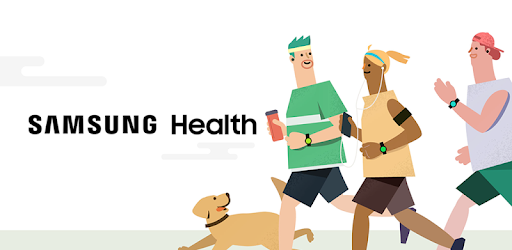

_"If you are in a bad mood, go for a walk. If you are still in a bad mood, go for another walk."_  Hippocrates.
    
In 2016, I have purchased a Samsung Galaxy S6 smartphone. Thanks to the preinstalled app "Samsung Health", I was able to track my daily number of steps and burned calories. This was very helpful because I was a very active student then. Seven years later, in 2023, I am still using the app but my daily life has significantly changed as I am now working as a data analyst, sitting at my desk almost all day long. This made me wonder :

* In 7 years, how many steps did I make in total ? 
* What year was I the most active ?
* How did my exercice habits change over time in terms of frequency and intensity of workouts ?

Let's find out!

# Table of contents
* [0. Introduction](#0)
* [1. Importing my pedometer data into a Pandas dataframe](#1)
 * [1.1. Preliminary remarks about the data source](#1.1)
 * [1.2. The import process](#1.2)
 * [1.3. A quick glance at the original dataset](#1.3)
* [2. Performing some quality checks](#2)
 * [2.1. Completion rate check](#2.1)
 * [2.2. Duplicates check](#2.2)
 * [2.3. Outliers check](#2.3)
* [3. Quick data preparation](#3)
* [4. Insights derived from data visualization](#4)
 * [4.1. I walked ca. 12,000 km walked over 6 years. This is the distance between Paris (France) and Vladivostok (Russia)!](#4.1)
 * [4.2. I was most active when working in Japan and at the end of the Covid19 French lockdown](#4.2)
 * [4.3. Reaching 10,000 steps a day is an everyday challenge!](#4.3)
* [5. Conclusion](#5)
 * [5.1. Summary of the insights and how to go further](#5.1) 
 * [5.2. Technical challenges encountered](#5.2) 
 * [5.3. What I learnt as a data analyst](#5.3) 

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1. Import my pedometer data into a Pandas dataframe</h2> <a class="anchor" id="1"></a>
</div>

## 1.1. Preliminary remarks about the data source <a class="anchor" id="1.1"></a>
*Data source* : To retrieve my pedometer data from the Samsung Health app, I had to download a csv file entitled "com.samsung.shealth.tracker.pedometer_day_summary.20230806172745".  

*Data structure* : The original dataset has 19 variables (more about them below). The first row of the csv file holds the title of the file. The 2nd row contains the names of the different variables. The rows below contain the observation values. 

*Information in the dataset* : The dataset provides information about the daily number of steps and calories burned. The information are summarized for each day in the dataset.

*To find out more* : Samsung provides a technical documentation for developers as well as the meaning of some variables here: https://developer.samsung.com/health/android/data/api-reference/com/samsung/android/sdk/healthdata/HealthConstants.StepCount.html

## 1.2. The import process <a class="anchor" id="1.2"></a>

In [1]:
# Import the relevant Python packages for the case study
import pandas as pd
from datetime import datetime

    # Data viz focus
import matplotlib.pyplot as plt
import seaborn as sns

    # Notebook format
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
# Import the data in a Pandas dataframe
    ## Since the csv file contains the names of the variables only in the 2nd row, 1st row is skipped
    ## Moreover, the values in the 1st column should not be considered as an index
pedometer = pd.read_csv('C:/Users/margo/Documents/Documents/Quotidien/Samsung_Health/samsunghealth_margot.2m_20230806172745/com.samsung.shealth.tracker.pedometer_day_summary.20230806172745.csv',
                skiprows = 1,
                index_col = False)

## 1.3. A quick glance at the original dataset <a class="anchor" id="1.3"></a>

In [3]:
# The data set contains 19 columns and 4,304 rows
print(pedometer.shape) 

# Have a glance at the first values of the original dataset
pedometer.head(6)

(4906, 19)


,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,distance,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time
0,6807,02fda250-e056-4773-bd10-f72e1828a737.binning_d...,3322088,6000,21,2016-12-20 08:10:19.980,com.sec.android.app.shealth,2016-12-20 08:10:19.980,NaN,2.536459,4994.66000,214.590000,6786,fzT18hJDCE,com.sec.android.app.shealth,4000,02fda250-e056-4773-bd10-f72e1828a737.achieveme...,02fda250-e056-4773-bd10-f72e1828a737,1482105600000
1,8697,6cc5d795-b6e6-434e-9b02-2c08e7e906cf.binning_d...,4652693,6000,18,2017-03-19 15:56:14.218,com.sec.android.app.shealth,2017-03-18 16:23:44.103,NaN,1.356969,6313.56000,262.939970,8679,VfS0qUERdZ,com.sec.android.app.shealth,0,6cc5d795-b6e6-434e-9b02-2c08e7e906cf.achieveme...,6cc5d795-b6e6-434e-9b02-2c08e7e906cf,1489881600000
2,852,d794ba61-21cc-4882-8797-024a257229eb.binning_d...,350197,6000,42,2016-12-06 23:00:02.906,com.sec.android.app.shealth,2016-12-06 23:00:02.906,NaN,2.444444,687.26996,32.699997,810,fzT18hJDCE,com.sec.android.app.shealth,0,d794ba61-21cc-4882-8797-024a257229eb.achieveme...,d794ba61-21cc-4882-8797-024a257229eb,1480982400000
3,11428,4730f039-2fa8-466a-a947-5dd0af347e7c.binning_d...,5794265,10000,39,2017-03-24 00:29:27.150,com.sec.android.app.shealth,2017-03-08 16:00:02.148,NaN,2.934353,8313.46000,354.810000,11389,fzT18hJDCE,com.sec.android.app.shealth,5116,4730f039-2fa8-466a-a947-5dd0af347e7c.achieveme...,4730f039-2fa8-466a-a947-5dd0af347e7c,1488931200000
4,5388,b1fdc6d6-57bd-4084-82db-4139f027f9c9.binning_d...,2757604,6000,0,2017-02-16 12:02:51.094,com.sec.android.app.shealth,2017-02-15 23:59:20.263,NaN,1.416400,3905.87000,165.170000,5388,VfS0qUERdZ,com.sec.android.app.shealth,0,b1fdc6d6-57bd-4084-82db-4139f027f9c9.achieveme...,b1fdc6d6-57bd-4084-82db-4139f027f9c9,1487203200000
5,15366,4308a8b1-3117-4e32-9890-2d4a8f208cde.binning_d...,6302277,6000,8950,2017-02-02 16:00:58.357,com.sec.android.app.shealth,2017-02-02 16:00:58.357,NaN,4.305555,14289.79000,870.130000,6416,fzT18hJDCE,com.sec.android.app.shealth,8405,4308a8b1-3117-4e32-9890-2d4a8f208cde.achieveme...,4308a8b1-3117-4e32-9890-2d4a8f208cde,1485993600000


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2. Perform some quality checks</h2><a class="anchor" id="2"></a>
</div>

Before analyzing the pedometer data in depth, one needs to first confirm that the data quality of the underlying dataset is good enough. To do so, 3 different quality checks were performed:

* _Completion rate check_ : Does the dataset have lots of Null values in specific columns?
* _Duplicates check_ : Does the dataset have indeed 1 row per day of observation ?
* _Outliers check_ : Do the columns contain values that make sense ?

## 2.1. Completion rate check <a class="anchor" id="2.1"></a>

_Check n°1 : What is the percentage of null values in each column of the dataframe ?_

In [4]:
# Methodology : 
# For each column in the dataframe, I counted the number of Null values and divided it by the total number of rows.
# To obtain a percentage format, I multipled the end result by 100.
pedometer.isna().sum() / pedometer.shape[0] * 100

step_count              0.000000
binning_data            0.000000
active_time             0.000000
recommendation          0.000000
run_step_count          0.000000
update_time             0.000000
source_package_name     0.000000
create_time             0.000000
source_info            59.845088
speed                   0.000000
distance                0.000000
calorie                 0.000000
walk_step_count         0.000000
deviceuuid              0.000000
pkg_name                0.000000
healthy_step            0.000000
achievement             0.000000
datauuid                0.000000
day_time                0.000000
dtype: float64

<div class="alert alert-block alert-success">
<b>Success:</b> All columns seem very well completed except one single column, "source_info" (more than half of the observations are Null). The latter will be dropped since it does not add value to the case study. Indeed, my health info come from a single data source: the app on my smartphone (I do not own a smart watch).
</div>

## 2.2 Duplicates check <a class="anchor" id="2.2"></a>

_Check n°2 : What is the granularity of the dataset ? Is it really one value per day or are there duplicates in the dataset?_

In [5]:
#Step 1 : Create dates from the timestamp variables
format1 ="%Y-%m-%d %H:%M:%S.%f"
format2 = "%Y-%m-%d"
pedometer["create_date"] = pedometer["create_time"].apply(lambda x: datetime.strptime(x, format1).strftime(format2))
pedometer["update_date"] = pedometer["update_time"].apply(lambda x: datetime.strptime(x, format1).strftime(format2))

In [6]:
# Step 2: Compute the number of rows per creation date, and returning the dates for which there are more than 1 row
date_counts = pedometer["create_date"].value_counts(ascending = False).rename_axis("create_date").to_frame("counts")
date_counts[date_counts["counts"] > 1].sort_values(["counts", "create_date"], ascending = False)

,counts
create_date,
2022-01-22,30
2019-10-30,5
2023-07-15,4
2023-06-24,4
2023-03-16,4
...,...
2016-12-07,2
2016-12-04,2
2016-12-03,2


<div class="alert alert-block alert-danger">
<b>Danger:</b> The original dataset has some duplicated values ! Indeed, many creation dates have more than 2 rows associated (in the extreme case, the creation date "2022-01-22" has up to 30 rows associated!). This seems to happen for no specific period (different years are represented). Let's investigate further on a small sample of observations to understand where the duplicates come from.
</div>

In [7]:
# Step 3: Confirm the existence of duplicated values thanks to a small sample
pedometer[pedometer["create_date"]>'2022-10-05'].sort_values("create_time", ascending = True)

,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,...,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time,create_date,update_date
4334,7939,e183f42f-9c35-4b24-abe0-a4b586a7b98c.binning_d...,4184406,7000,10,2022-10-06 19:50:08.905,com.sec.android.app.shealth,2022-10-06 06:44:04.474,e183f42f-9c35-4b24-abe0-a4b586a7b98c.source_in...,1.385384,...,246.01991,7929,VfS0qUERdZ,com.sec.android.app.shealth,0,e183f42f-9c35-4b24-abe0-a4b586a7b98c.achieveme...,e183f42f-9c35-4b24-abe0-a4b586a7b98c,1665014400000,2022-10-06,2022-10-06
4339,7939,cdc6fc50-ac4c-40eb-b828-12e9daedc009.binning_d...,4184406,7000,10,2022-10-06 22:00:04.971,com.sec.android.app.shealth,2022-10-06 22:00:04.971,NaN,1.385384,...,246.01991,7929,xDq4cMfd7l,com.sec.android.app.shealth,0,cdc6fc50-ac4c-40eb-b828-12e9daedc009.achieveme...,cdc6fc50-ac4c-40eb-b828-12e9daedc009,1665014400000,2022-10-06,2022-10-06
4346,15038,32fcc169-0653-4848-a4ed-f7778bc8430d.binning_d...,7911939,7000,0,2022-10-07 20:35:46.424,com.sec.android.app.shealth,2022-10-07 05:52:46.705,32fcc169-0653-4848-a4ed-f7778bc8430d.source_in...,1.386041,...,460.59998,15038,VfS0qUERdZ,com.sec.android.app.shealth,0,32fcc169-0653-4848-a4ed-f7778bc8430d.achieveme...,32fcc169-0653-4848-a4ed-f7778bc8430d,1665100800000,2022-10-07,2022-10-07
4350,15038,881694d7-78ce-4ce2-b9fa-e0a203587968.binning_d...,7911939,7000,0,2022-10-07 22:00:03.539,com.sec.android.app.shealth,2022-10-07 22:00:03.539,NaN,1.386041,...,460.59998,15038,xDq4cMfd7l,com.sec.android.app.shealth,0,881694d7-78ce-4ce2-b9fa-e0a203587968.achieveme...,881694d7-78ce-4ce2-b9fa-e0a203587968,1665100800000,2022-10-07,2022-10-07
4356,9310,d3f46757-a7d6-49a9-b76d-8a0e29649b5d.binning_d...,5015033,7000,6,2022-10-08 20:02:20.286,com.sec.android.app.shealth,2022-10-08 07:54:05.233,d3f46757-a7d6-49a9-b76d-8a0e29649b5d.source_in...,1.346731,...,289.83997,9304,VfS0qUERdZ,com.sec.android.app.shealth,0,d3f46757-a7d6-49a9-b76d-8a0e29649b5d.achieveme...,d3f46757-a7d6-49a9-b76d-8a0e29649b5d,1665187200000,2022-10-08,2022-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,5712,15785417-57b3-4c35-97d7-c01d269418a3.binning_d...,2965304,7000,0,2023-08-04 20:48:57.023,com.sec.android.app.shealth,2023-08-04 03:46:20.774,15785417-57b3-4c35-97d7-c01d269418a3.source_in...,1.405056,...,174.86996,5712,VfS0qUERdZ,com.sec.android.app.shealth,0,15785417-57b3-4c35-97d7-c01d269418a3.achieveme...,15785417-57b3-4c35-97d7-c01d269418a3,1691107200000,2023-08-04,2023-08-04
4759,5712,4d34234c-f0f6-4d47-b6cc-c4bb18dcefd1.binning_d...,2965304,7000,0,2023-08-04 22:00:01.573,com.sec.android.app.shealth,2023-08-04 22:00:01.573,NaN,1.405056,...,174.86996,5712,xDq4cMfd7l,com.sec.android.app.shealth,0,4d34234c-f0f6-4d47-b6cc-c4bb18dcefd1.achieveme...,4d34234c-f0f6-4d47-b6cc-c4bb18dcefd1,1691107200000,2023-08-04,2023-08-04
4766,6909,e0f0b68b-8eab-4511-abd1-db212f6cd273.binning_d...,3598025,7000,0,2023-08-05 17:56:56.172,com.sec.android.app.shealth,2023-08-05 09:39:39.607,e0f0b68b-8eab-4511-abd1-db212f6cd273.source_in...,1.398914,...,210.39998,6909,VfS0qUERdZ,com.sec.android.app.shealth,0,e0f0b68b-8eab-4511-abd1-db212f6cd273.achieveme...,e0f0b68b-8eab-4511-abd1-db212f6cd273,1691193600000,2023-08-05,2023-08-05
4770,6909,7d022eb4-acb5-4efc-a632-9f187dff9fe2.binning_d...,3598025,7000,0,2023-08-05 22:00:02.552,com.sec.android.app.shealth,2023-08-05 22:00:02.552,NaN,1.398914,...,210.39998,6909,xDq4cMfd7l,com.sec.android.app.shealth,0,7d022eb4-acb5-4efc-a632-9f187dff9fe2.achieveme...,7d022eb4-acb5-4efc-a632-9f187dff9fe2,1691193600000,2023-08-05,2023-08-05


<div class="alert alert-block alert-warning">
<b>Learnings:</b> Rows seem to be completely identical as far as the step counts and calories are considered. However, 2 differences are to be noticed: <br> i) The duplicates seem to occur due to the 'binning data', 'source info' and 'deviceuuid' columns ; <br> ii) For some unknown reason, the create time and update time are exactly identical as far as the deviceuuid "xDq4cMfd7l" is considered. 
</div>

In [8]:
# Step 4: Investigate the differences between deviceuuid
pedometer.groupby("deviceuuid").agg({'create_date': [min, max]})

create_date            
                   min         max
deviceuuid                        
VfS0qUERdZ  2016-11-25  2023-08-06
fzT18hJDCE  2016-11-26  2019-09-17
t/q+ToT9P9  2019-09-19  2022-01-22
xDq4cMfd7l  2022-01-22  2023-08-05

<div class="alert alert-block alert-warning">
<b>Learnings:</b> There are 4 deviceuuids in the dataset, but only "VfS0qUERdZ" seems to cover the whole period. Other deviceuuids like 't/q+ToT9P9' cover a much shorter period of time.
</div>

In [9]:
# Step 5 : Keep only the data associated to the deviceuuid "VfS0qUERdZ"
pedometer = pedometer[pedometer["deviceuuid"]=="VfS0qUERdZ"]
pedometer.sort_values("create_date", ascending = True).head(8)

,step_count,binning_data,active_time,recommendation,run_step_count,update_time,source_package_name,create_time,source_info,speed,...,calorie,walk_step_count,deviceuuid,pkg_name,healthy_step,achievement,datauuid,day_time,create_date,update_date
178,385,a93bfe30-f6c4-4d21-9ea6-24f041f4fd26.binning_d...,167688,6000,6,2016-11-25 19:04:33.444,com.sec.android.app.shealth,2016-11-25 13:13:03.287,NaN,1.631118,...,14.47000,379,VfS0qUERdZ,com.sec.android.app.shealth,0,a93bfe30-f6c4-4d21-9ea6-24f041f4fd26.achieveme...,a93bfe30-f6c4-4d21-9ea6-24f041f4fd26,1480032000000,2016-11-25,2016-11-25
13,7088,9f320dff-0957-4b70-86ae-2a882263139d.binning_d...,2595080,6000,6083,2016-11-27 18:03:05.574,com.sec.android.app.shealth,2016-11-27 17:15:01.242,NaN,2.849973,...,492.03000,1005,VfS0qUERdZ,com.sec.android.app.shealth,0,9f320dff-0957-4b70-86ae-2a882263139d.achieveme...,9f320dff-0957-4b70-86ae-2a882263139d,1480204800000,2016-11-27,2016-11-27
18,2014,20a4ce2d-5bcc-442d-a80e-fc3f442087ba.binning_d...,936206,6000,7,2016-11-28 19:04:31.036,com.sec.android.app.shealth,2016-11-28 07:38:07.812,NaN,1.550908,...,67.25000,2007,VfS0qUERdZ,com.sec.android.app.shealth,0,20a4ce2d-5bcc-442d-a80e-fc3f442087ba.achieveme...,20a4ce2d-5bcc-442d-a80e-fc3f442087ba,1480291200000,2016-11-28,2016-11-28
79,9626,42d66b02-3de3-418b-8b1a-a8e918b29889.binning_d...,3499741,6000,8986,2016-11-29 17:11:49.441,com.sec.android.app.shealth,2016-11-29 09:22:50.469,NaN,2.906311,...,687.09000,640,VfS0qUERdZ,com.sec.android.app.shealth,0,42d66b02-3de3-418b-8b1a-a8e918b29889.achieveme...,42d66b02-3de3-418b-8b1a-a8e918b29889,1480377600000,2016-11-29,2016-11-29
161,1051,9f63422a-45db-4a68-9afe-2b17db629d3d.binning_d...,499284,6000,4,2016-11-30 21:51:08.121,com.sec.android.app.shealth,2016-11-30 11:14:33.504,NaN,1.512105,...,34.97000,1047,VfS0qUERdZ,com.sec.android.app.shealth,0,9f63422a-45db-4a68-9afe-2b17db629d3d.achieveme...,9f63422a-45db-4a68-9afe-2b17db629d3d,1480464000000,2016-11-30,2016-11-30
33,1937,b13e9292-d0c1-44cf-89b6-ea3ae6e9aa87.binning_d...,945463,6000,4,2016-12-01 16:36:23.994,com.sec.android.app.shealth,2016-12-01 05:48:27.735,NaN,1.471807,...,63.34000,1933,VfS0qUERdZ,com.sec.android.app.shealth,0,b13e9292-d0c1-44cf-89b6-ea3ae6e9aa87.achieveme...,b13e9292-d0c1-44cf-89b6-ea3ae6e9aa87,1480550400000,2016-12-01,2016-12-01
166,24,2c9a0767-1055-41c7-95cf-c0a2b897437f.binning_d...,14945,6000,0,2016-12-02 10:55:01.785,com.sec.android.app.shealth,2016-12-02 10:54:01.186,NaN,1.114074,...,0.76000,24,VfS0qUERdZ,com.sec.android.app.shealth,0,2c9a0767-1055-41c7-95cf-c0a2b897437f.achieveme...,2c9a0767-1055-41c7-95cf-c0a2b897437f,1480636800000,2016-12-02,2016-12-02
165,2553,4fb78b1b-f88f-4afc-8a0e-def28eaf01b9.binning_d...,1192879,6000,3,2016-12-03 18:32:53.136,com.sec.android.app.shealth,2016-12-03 07:35:01.642,NaN,1.545311,...,83.10999,2550,VfS0qUERdZ,com.sec.android.app.shealth,0,4fb78b1b-f88f-4afc-8a0e-def28eaf01b9.achieveme...,4fb78b1b-f88f-4afc-8a0e-def28eaf01b9,1480723200000,2016-12-03,2016-12-03


In [10]:
# Step 6: One chooses to remove variables that: 
    # i) cause duplicates,
    # ii) are no use for the case study, 
    #iii) cannot be understood due to the lack of documentation
pedometer = pedometer.drop(["binning_data", "source_package_name", "source_info", 
                            "pkg_name", "achievement", "deviceuuid", "datauuid",
                           "healthy_step", "speed" , "active_time",
                            #"create_time", "update_time"
                           ], axis =1 )

In [11]:
# Step 7 : Rearrange the order of columns to improve readability
cols = ['create_date','update_date','recommendation',
        'step_count','walk_step_count','run_step_count','distance',
        'calorie', 'day_time','create_time','update_time'
]
pedometer = pedometer[cols]
pedometer.sort_values("create_date", ascending = False).head(8)

,create_date,update_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,create_time,update_time
4775,2023-08-06,2023-08-06,7000,5393,5393,0,3922.57030,163.229980,1691280000000,2023-08-06 05:13:21.658,2023-08-06 15:17:45.681
4766,2023-08-05,2023-08-05,7000,6909,6909,0,5033.33000,210.399980,1691193600000,2023-08-05 09:39:39.607,2023-08-05 17:56:56.172
4753,2023-08-04,2023-08-04,7000,5712,5712,0,4166.42040,174.869960,1691107200000,2023-08-04 03:46:20.774,2023-08-04 20:48:57.023
4743,2023-08-03,2023-08-03,7000,5875,5875,0,4293.95000,179.279970,1691020800000,2023-08-03 05:03:10.777,2023-08-03 19:52:18.967
4735,2023-08-02,2023-08-02,7000,201,201,0,140.04999,6.799999,1690934400000,2023-08-02 06:03:03.855,2023-08-02 20:38:48.852
4905,2023-08-01,2023-08-01,7000,3893,3893,0,2822.49000,119.369990,1690848000000,2023-08-01 06:33:00.342,2023-08-01 18:15:13.458
4903,2023-07-30,2023-07-30,7000,18,18,0,12.50000,0.580000,1690761600000,2023-07-30 22:44:22.646,2023-07-30 22:45:26.487
4899,2023-07-29,2023-07-29,7000,4287,4287,0,3079.18000,131.040000,1690588800000,2023-07-29 07:22:22.695,2023-07-29 21:15:11.853


<div class="alert alert-block alert-success">
<b>Success:</b> In the sample rows above, duplicates have been correctly eliminated (e.g. only 1 row per create_date).
</div>

In [12]:
# Step 8 : Ensure there are no more duplicates
date_counts = pedometer["create_date"].value_counts(ascending = False).rename_axis("create_date").to_frame("counts")
date_counts[date_counts["counts"] > 1].sort_values("create_date", ascending = False)

,counts
create_date,
2023-07-29,2
2023-07-19,2
2023-07-15,2
2023-06-28,2
2023-06-24,2
...,...
2017-01-09,2
2017-01-07,2
2017-01-02,2


<div class="alert alert-block alert-danger">
<b>Danger:</b> There are still duplicates in the dataset !
</div>

In [13]:
# Investigate further and focusing on some examples that still have duplicate values based on step 6 results
pedometer[(pedometer["create_date"]>='2022-09-14')
          & (pedometer["create_date"]<='2022-09-18')
         ].sort_values("create_date")

,create_date,update_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,create_time,update_time
4074,2022-09-14,2022-09-14,7000,26575,26528,47,18841.6300,1017.57996,1663113600000,2022-09-14 06:15:40.190,2022-09-14 20:51:22.522
4084,2022-09-14,2022-09-15,7000,32481,32481,0,22865.4000,1236.21000,1663200000000,2022-09-14 23:23:31.277,2022-09-15 20:02:44.497
4092,2022-09-16,2022-09-16,7000,25937,25916,21,18275.8000,971.73000,1663286400000,2022-09-16 06:55:10.384,2022-09-16 21:31:03.990
4106,2022-09-17,2022-09-17,7000,16893,16893,0,12084.1200,597.49994,1663372800000,2022-09-17 02:35:02.947,2022-09-17 22:00:06.087
4127,2022-09-17,2022-09-18,7000,7814,7797,17,5792.9995,254.11989,1663459200000,2022-09-17 22:00:05.866,2022-09-18 20:55:44.726


<div class="alert alert-block alert-warning">
<b>Learnings:</b> Remaining duplicates seem to occur because there is a problem with the 'create_date' variable in the original dataset. Indeed, as you can see, there is no "create_date" record for the dates '2022-09-15' or '2022-09-18'. The values are in fact to be derived from the update_date, not the create_date! To confirm this way of interpretating the data, I checked the values of "step_count" and "calorie" in my Samsung Health app: they are aligned.
</div>

In [14]:
# Step 9 : Create a "clean_date" variable. 3 rules are used to populate the variable:
    # i) When there is no duplicate of the 'create_date' variable, simply take the 'create_date' (e.g. create_date = '2022-09-16')
    # ii) When there are duplicates of the create_date variable:
        # ii.a) Case 1 : The values of the couple ("create_date", "update_date") are different 
            #-> Take the "update_date" instead (eg. create_date = '2022-09-17')
        # ii.b) Case 2 : The values of the couple ("create_date", "update_date") are identical
            #-> One orders the create_time in ascending order
            # -> Then one assigns the create_date to rank=1 and update_date for all the other ranks
            # (e.g. create_date '2022-09-26')
            
# Identify duplicates
pedometer["is_duplicate"] = pedometer.duplicated(subset = "create_date", keep = False)
#pedometer["is_duplicate2"] = pedometer.duplicated(subset = ["create_date", "update_date"], keep = False)

# Compute the rank of each observation that shares the same create_date
pedometer["rank_create_time"] = pedometer.groupby("create_date")["day_time"].rank(ascending = True)

# Create the "clean_date" variable based on conditions
pedometer.loc[pedometer["is_duplicate"] == 0, "clean_date"] = pedometer["create_date"] # rule i)
pedometer.loc[(pedometer["is_duplicate"] == 1) & 
              (pedometer["rank_create_time"]==1), "clean_date"] = pedometer["create_date"] # rule ii.a)
pedometer.loc[(pedometer["is_duplicate"] == 1) & 
              (pedometer["rank_create_time"]!=1), "clean_date"] = pedometer["update_date"] # rule ii.b)

#Rearrange the columns
cols = pedometer.columns.tolist()
cols = cols[-1:] + cols[:-1]
pedometer = pedometer[cols] 

# Test on a sample
pedometer[((pedometer["create_date"]>="2022-09-14") & (pedometer["create_date"]<="2022-09-18"))
          | ((pedometer["create_date"]>="2017-01-07") & (pedometer["create_date"]<="2017-01-09"))
          | (pedometer["create_date"]=='2022-09-26')
         ].sort_values("create_time")

,clean_date,create_date,update_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,create_time,update_time,is_duplicate,rank_create_time
212,2017-01-07,2017-01-07,2017-01-07,6000,8476,8458,18,6144.3300,263.900000,1483747200000,2017-01-07 09:41:41.605,2017-01-07 15:53:43.490,True,1.0
110,2017-01-08,2017-01-07,2017-01-08,6000,7229,7176,53,5357.5000,225.970000,1483833600000,2017-01-07 16:31:00.685,2017-01-08 14:17:00.797,True,2.0
62,2017-01-09,2017-01-09,2017-01-09,6000,6596,6586,10,4764.3800,211.010000,1483920000000,2017-01-09 00:09:01.712,2017-01-09 13:34:42.569,True,1.0
91,2017-01-10,2017-01-09,2017-01-10,6000,11165,6073,5092,9963.6200,574.029970,1484006400000,2017-01-09 23:08:00.260,2017-01-10 13:43:47.388,True,2.0
4074,2022-09-14,2022-09-14,2022-09-14,7000,26575,26528,47,18841.6300,1017.579960,1663113600000,2022-09-14 06:15:40.190,2022-09-14 20:51:22.522,True,1.0
4084,2022-09-15,2022-09-14,2022-09-15,7000,32481,32481,0,22865.4000,1236.210000,1663200000000,2022-09-14 23:23:31.277,2022-09-15 20:02:44.497,True,2.0
4092,2022-09-16,2022-09-16,2022-09-16,7000,25937,25916,21,18275.8000,971.730000,1663286400000,2022-09-16 06:55:10.384,2022-09-16 21:31:03.990,False,1.0
4106,2022-09-17,2022-09-17,2022-09-17,7000,16893,16893,0,12084.1200,597.499940,1663372800000,2022-09-17 02:35:02.947,2022-09-17 22:00:06.087,True,1.0
4127,2022-09-18,2022-09-17,2022-09-18,7000,7814,7797,17,5792.9995,254.119890,1663459200000,2022-09-17 22:00:05.866,2022-09-18 20:55:44.726,True,2.0
4215,2022-09-26,2022-09-26,2022-09-27,7000,9184,9141,43,6750.3500,289.429930,1664150400000,2022-09-26 05:14:48.437,2022-09-27 22:00:04.547,True,1.0


<div class="alert alert-block alert-success">
<b>Success:</b> Duplicates have been removed ! Final remark: The process of removing duplicates has been quite tedious. It would have been much cleaner and quicker if the online documentation was more exhaustive (e.g. explaining why there may be different deviceuuids, why update_time and create_time may be mixed up, etc).
</div>

## 2.3. Outliers check <a class="anchor" id="2.3"></a>

_Check n°3 : Are there any values in the dataset that do not seem to make any sense ?_

In [15]:
# Summarize the data
pedometer["distance_km"]= pedometer["distance"]/1000
pedometer.describe()

,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,day_time,rank_create_time,distance_km
count,2440.000000,2440.00000,2440.000000,2440.000000,2440.000000,2440.000000,2.440000e+03,2440.000000,2440.000000
mean,7013.524590,7376.30000,7027.740984,348.559016,5531.551459,254.671187,1.585887e+12,1.093443,5.531551
std,481.964039,5831.74738,5788.119321,984.001887,4269.367250,201.476133,6.095753e+10,0.291111,4.269367
min,6000.000000,13.00000,13.000000,0.000000,9.770000,0.360000,1.480032e+12,1.000000,0.009770
25%,7000.000000,3463.50000,2959.750000,9.000000,2639.557275,120.559975,1.533233e+12,1.000000,2.639557
50%,7000.000000,6601.50000,6288.000000,54.000000,4915.990000,220.065000,1.586002e+12,1.000000,4.915990
75%,7000.000000,9496.50000,9014.000000,186.000000,7230.450000,327.924970,1.638684e+12,1.000000,7.230450
max,10000.000000,40607.00000,40565.000000,9069.000000,29208.210000,1350.090000,1.691280e+12,2.000000,29.208210


<div class="alert alert-block alert-success">
<b>Success:</b> The values seem to be coherent:
    <br>i) There are no negative values for the distance, number of steps or calories burned ;
    <br>ii) Maximal values seem to be aligned with what I have in mind: I know that I can walk easily more than 25 kms / day when I am hiking.
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. Data preparation</h2><a class="anchor" id="3"></a>
</div>

In [16]:
# Step 1 : Remove columns that were useful for duplicates check (see above)
pedometer = pedometer.drop(columns = ["is_duplicate", "rank_create_time", 
                                      "create_date", "update_date", "create_time", "update_time",
                                      "day_time"])

# Step 2 : Create some additional date variables (year, month, week)
# Date abbreviations
pedometer["year"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%Y"))
pedometer["month"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
pedometer["week"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%W"))
# Date numbers
pedometer["month_number"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%m"))
pedometer["week_number"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%W"))
pedometer["day_number"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%d"))
# Date labels
pedometer["weekday"] = pedometer["clean_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%A"))
# Some numeric variables that will be useful for data visualization
pedometer["steps_thousand"] = pedometer["step_count"]/1000
pedometer["walk_steps_thousand"] = pedometer["walk_step_count"]/1000
pedometer["run_steps_thousand"] = pedometer["run_step_count"]/1000

pedometer.head(5)

,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,month,week,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand
1,2017-03-19,6000,8697,8679,18,6313.56,262.93997,6.31356,2017,2017-03,2017-11,03,11,19,Sunday,8.697,8.679,0.018
4,2017-02-15,6000,5388,5388,0,3905.87,165.17000,3.90587,2017,2017-02,2017-07,02,07,15,Wednesday,5.388,5.388,0.000
7,2017-02-09,6000,5402,5392,10,3919.18,167.84999,3.91918,2017,2017-02,2017-06,02,06,09,Thursday,5.402,5.392,0.010
8,2017-01-30,6000,15350,15286,64,11175.10,472.72995,11.17510,2017,2017-01,2017-05,01,05,30,Monday,15.350,15.286,0.064
10,2016-12-17,6000,9854,785,9069,10431.82,712.87000,10.43182,2016,2016-12,2016-50,12,50,17,Saturday,9.854,0.785,9.069


In [17]:
# Export the cleaned data to Excel
pedometer.to_csv("pedometer_data.csv", sep = ";", index = False)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4. Insights from data exploration</h2><a class="anchor" id="4"></a>
</div>

## 4.1. I walked ca. 13,500 km walked over 7 years. This is the distance between Paris (France) and Vladivostok (Russia)!  <a class="anchor" id="4.1"></a>

In [18]:
# Some descriptive statitics
total_activity = pedometer[["step_count", "distance_km"]].sum()
avg_activity = pedometer[["step_count", "distance_km"]].sum() / pedometer["clean_date"].nunique()

print("Between 2016 and 2023, I walked in total:", '\033[1m', int(total_activity[0]),  '\033[0m', "steps, i.e.", 
      '\033[1m', int(total_activity[1]), "km.", '\033[0m',)

print("Equivalently, per day, I walked on average:", '\033[1m', int(avg_activity[0]),  '\033[0m', "steps, i.e.", 
      '\033[1m', int(avg_activity[1]), "km.", '\033[0m',)

Between 2016 and 2023, I walked in total:  17998172  steps, i.e.  13496 km. 
Equivalently, per day, I walked on average:  7613  steps, i.e.  5 km. 


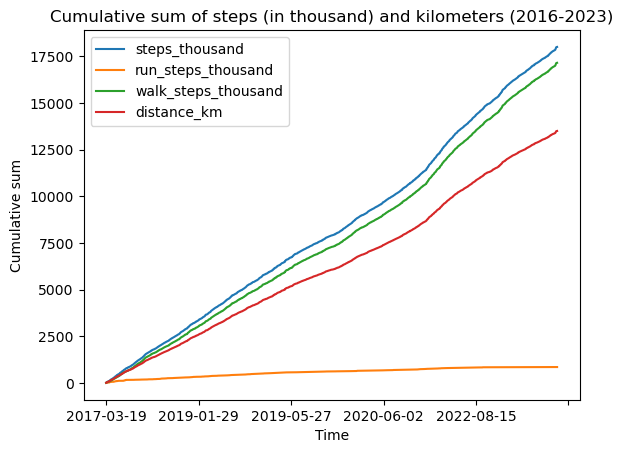

In [19]:
# Graph n°1: Cumulative sum of my steps and distance traveled
g1 = pedometer.set_index("clean_date")[["steps_thousand", "run_steps_thousand", 
                                        "walk_steps_thousand", "distance_km"]].cumsum().plot()

g1.set_title("Cumulative sum of steps (in thousand) and kilometers (2016-2023)")
g1.set(xlabel = "Time", ylabel= 'Cumulative sum')
plt.show()


<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
<br>
    <br><b>Most of my steps are derived from walking, not running</b> (cf steep green line vs flat orange line). Furthermore, over 7 years, I was able to walk ca. 18 million steps, i.e. 13,500 km (~8,300 miles). This represents 7,600 steps/day, or put it differently 5 kms/day. 
<br>
    <br><b>I tend to walk more in my daily life in the recent years</b> (cf. steeper slope from 2020 onwards).
</div>

## 4.2. I was most active when working in Japan and at the end of the Covid19 French lockdown <a class="anchor" id="4.2"></a>

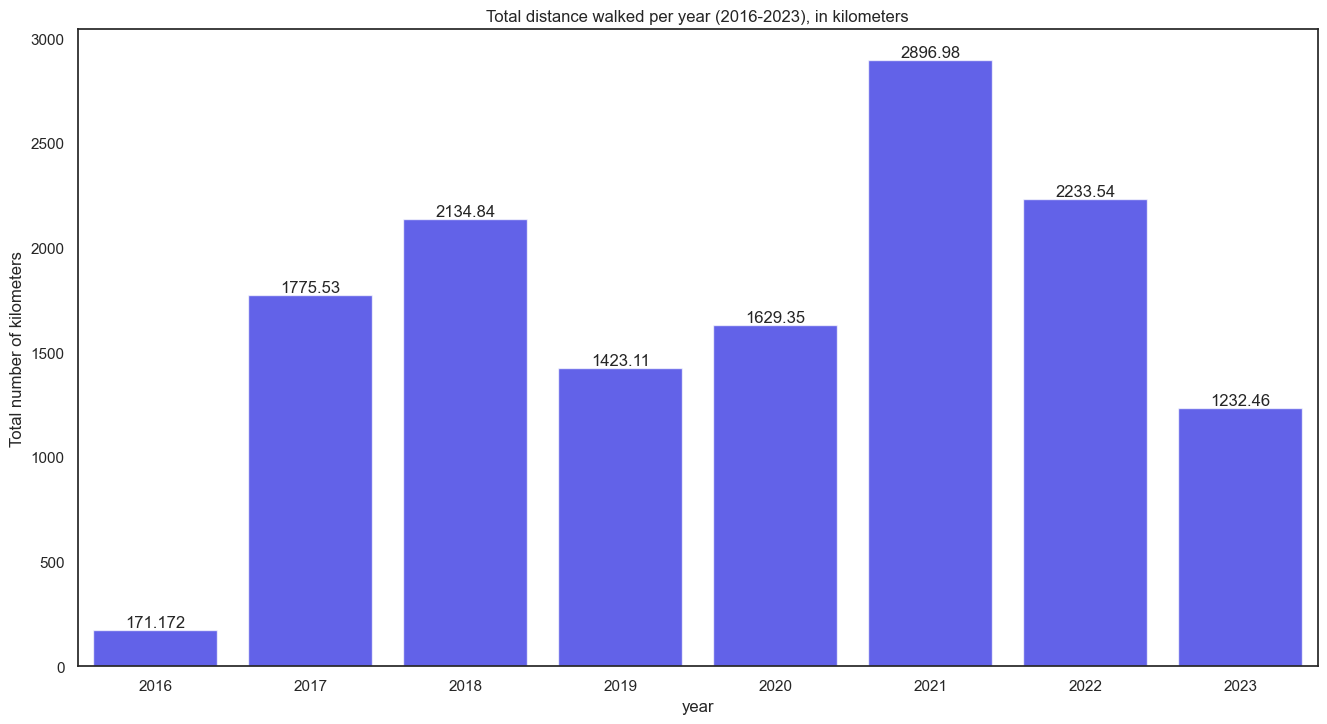

In [20]:
# Graph n°2 a) : Total distance (in kilometers) walked every year (2016-2023)
sns.set(rc={'figure.figsize':(16,8.27)})
sns.set_style("white")

data_year = pedometer.groupby("year")[["step_count", "distance_km"]].sum().reset_index()
g2 = sns.barplot(data = data_year, x= "year", y = "distance_km" , color = "blue", alpha = 0.7)
g2.set_title("Total distance walked per year (2016-2023), in kilometers")
g2.set(xlabel = "year", ylabel= "Total number of kilometers")

for i in g2.containers:
    g2.bar_label(i,)

<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
<br>

<br> <b>From a very broad perspective, it seems that I used to walk ca. 1,700 kilometers/year for the period 2017-2021.</b> However, there are some "outliers" years.
<br> 2019 was the year I was the least active (1,400 km) as I was busy preparing for my final exams and data analyst job search.
<br>On the contrary, 2021 was my record-breaking year (2,900 km). I was so excited that the Covid19 was (temporarily) over that I went out as much as possible. Every weekend, I was hiking, going to the swimming pool, etc. In 2022, I walked less than in 2021 but still more than pre-pandemic.
<br> Note: I ignored 2016 and 2023 since I do not have complete data for these years. <br>

</div>

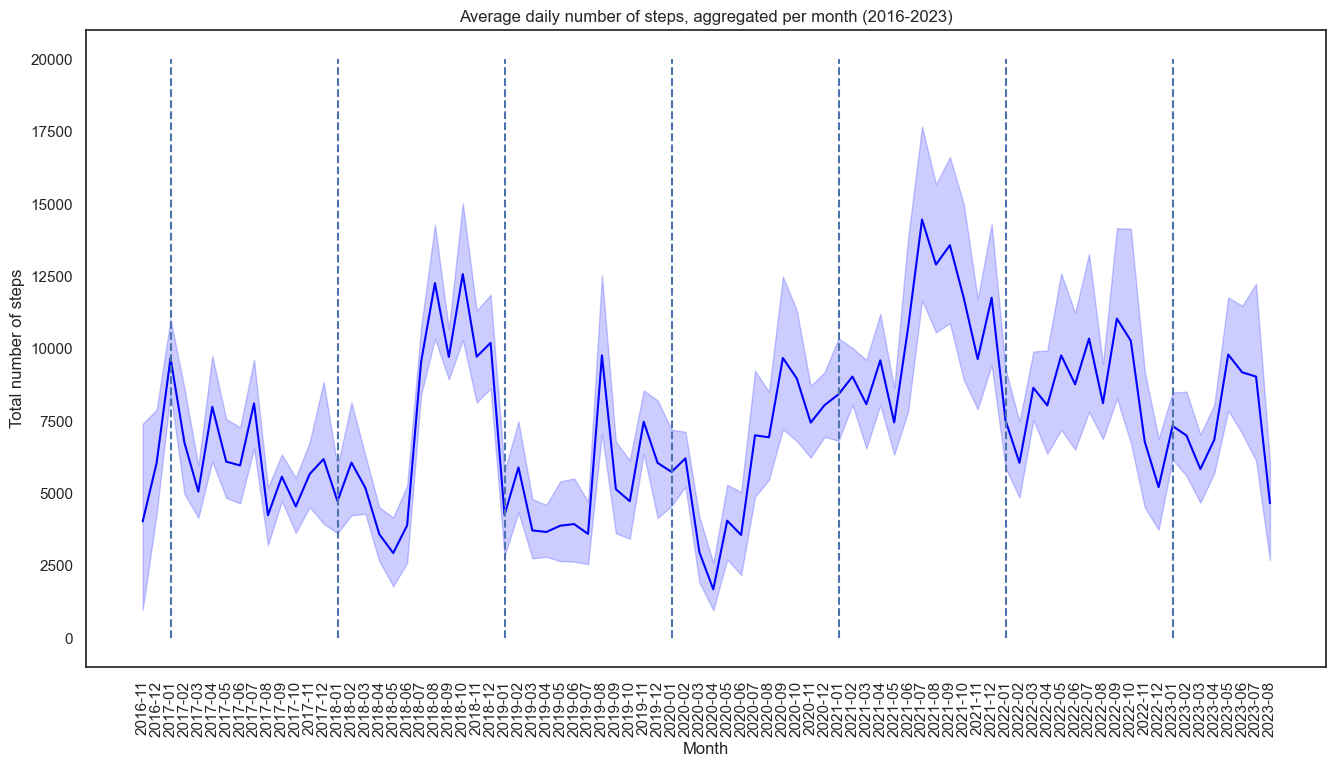

In [21]:
# Graph n°2b) : Average daily number of steps, aggregated per month (2016-2023)
sns.set(rc={'figure.figsize':(16,8.27)})
sns.set_style("white")

g2 = sns.lineplot(data = pedometer.sort_values("month"), x= "month", y = "step_count", color = "blue")
g2.set_title("Average daily number of steps, aggregated per month (2016-2023)")
g2.set(xlabel = "Month", ylabel= "Total number of steps")

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

g2.vlines(x='2017-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2017')
g2.vlines(x='2018-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2018')
g2.vlines(x='2019-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2019')
g2.vlines(x='2020-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2020')
g2.vlines(x='2021-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2021')
g2.vlines(x='2022-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2022')
g2.vlines(x='2023-01', ymin=0, ymax=20000, color='b', linestyles = "dashed", label='2023')

plt.show()

<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
<br>
<br> <b>The graph above shows that my walking habits were not consistent over the last 7 years (i.e. I did not walk exactly 7,600 steps every day).</b> For instance, the years 2017 and 2019 were quite below average, whereas 2018 and 2021 were above average. More specifically, my lowest point was reached in March / April 2020 , when France enforced its first lockdown due to the Covid19 pandemic crisis. This explains why I was walking only 2,500 steps a day. On the contrary, my peak was achieved in June / July 2021, i.e. when the French government allowed again social activities (e.g. hiking in groups, going to the swimming pool, etc). At that time, I was walking about 14,000 steps a day.<br>
<br>
<b>Some seasonality seems also to be at play. My busiest periods often take place in summer (July to September)</b>. Indeed:  
    <br> i) 2018 2nd semester: This corresponds to the period I was working in Japan. I had to walk a lot in my daily life for going to work and grocery shopping (my apartment was located 20 minutes away from the nearest train station). In summer, I also enjoyed "Obon" holidays by traveling to Hokkaido.
    <br> ii) 2019 August: This refers to my trip in the Netherlands before starting my first full time job. I walked a lot to discover cities Amsterdam or The Hague.
    <br> iii) 2020 August and 2021 August: Covid was (temporarily) over in France and I joined hiking groups to walk in the woods every weekend.<br>
    <br> 
<b> It seems that I became more active since the beginning of the Covid19 crisis (cf. positive slope for several consecutive months from March 2020 onwards) </b>. In 2022 however, I walked less than in 2021 but the daily average number of steps is still above that of the other years.<br> 
<br>
<b>Finally, the confidence intervals in light blue become more spread over time.</b> This suggests that the daily average number of steps displayed with the dark blue line does not perfectly reflect the reality: there may be days I walk far less or far more than the average number in the recent period.
   
</div>

[Text(0.5, 0, 'Month number'), Text(0, 0.5, 'Distance (km)')]

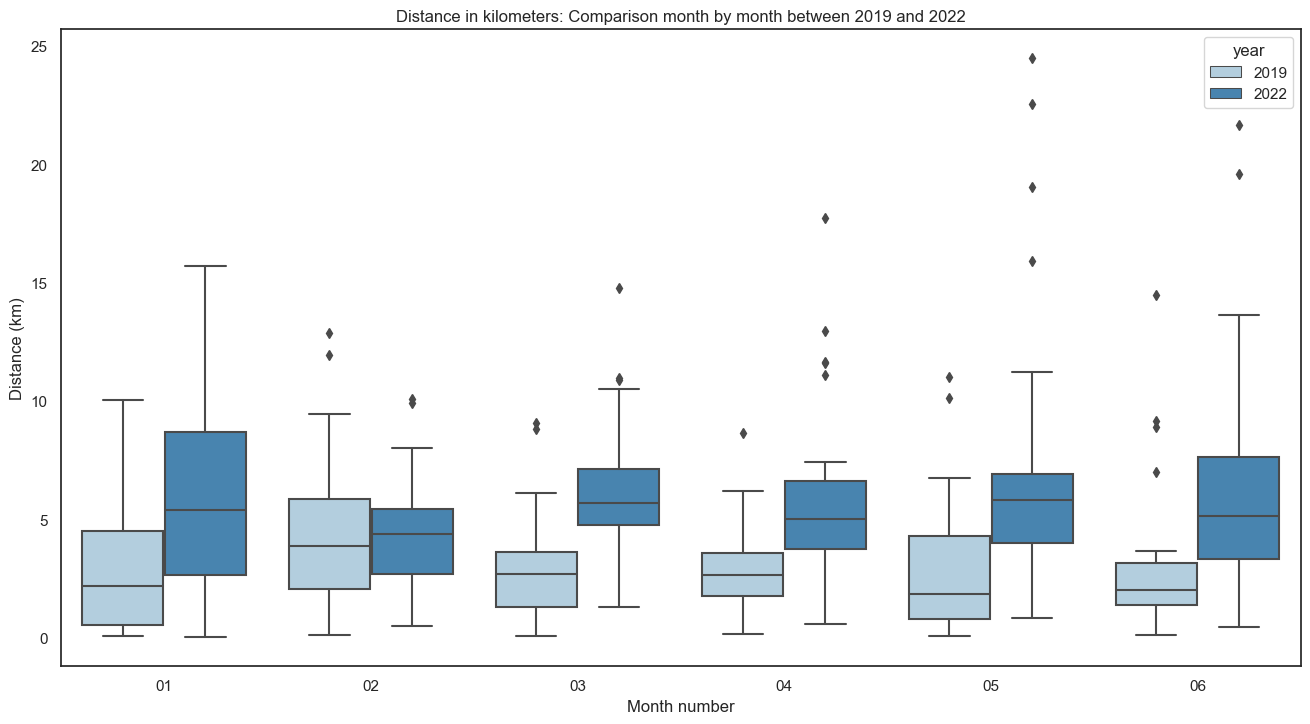

In [22]:
# Graph n°3 : Let's compare the distribution of steps on a small sample of data
    # Monthly comparison, 2019 vs 2022
sample = pedometer[((pedometer["year"]=="2022") & (pedometer["month_number"]<="06"))
                   | ((pedometer["year"]=="2019") & (pedometer["month_number"]<="06"))
                  ].sort_values("clean_date")

g3 = sns.boxplot(data = sample, x= "month_number", y = "distance_km", hue = "year", palette = "Blues")
g3.set_title("Distance in kilometers: Comparison month by month between 2019 and 2022")
g3.set(xlabel = "Month number", ylabel= "Distance (km)")

<div class="alert alert-block alert-warning">
<b>Learnings:</b> The boxplot above shows the distribution of kilometers traveled in a day. It is computed by month, with a comparison between 2019 and 2022 (1st semester only considered in the sample for readibility purposes).
<br>
    <br> <b>It shows that I am systematically more active in 2022 than in 2019</b> (the median in the dark blue box is always above that of the light blue box).
    <br>
    <br> <b> More importantly, it shows that the distance I travel daily varies much more in 2022 than in 2019 </b>. Indeed, the whiskers are much more spead out in 2022. There are also much more outliers that lie very far from the median line. The variation is mostly driven by high values (right skewed distribution). Indeed, the first quartile (Q1) value stays very consistent on the contrary (close to zero) : there are some days I am not active at all, whatever the month or the year considered.
 
</div>

## 4.3. Reaching 10,000 steps a day is an everyday challenge!   <a class="anchor" id="4.3"></a>

In [23]:
# Create a new variable "goal_10000": It returns 1 if I walked more than 10 000 steps a day
pedometer.loc[pedometer["step_count"]>=10000, "goal_10000"] = 1
pedometer.loc[pedometer["step_count"]<10000, "goal_10000"] = pedometer["step_count"]/10000
pedometer.head(5)

,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,month,week,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand,goal_10000
1,2017-03-19,6000,8697,8679,18,6313.56,262.93997,6.31356,2017,2017-03,2017-11,03,11,19,Sunday,8.697,8.679,0.018,0.8697
4,2017-02-15,6000,5388,5388,0,3905.87,165.17000,3.90587,2017,2017-02,2017-07,02,07,15,Wednesday,5.388,5.388,0.000,0.5388
7,2017-02-09,6000,5402,5392,10,3919.18,167.84999,3.91918,2017,2017-02,2017-06,02,06,09,Thursday,5.402,5.392,0.010,0.5402
8,2017-01-30,6000,15350,15286,64,11175.10,472.72995,11.17510,2017,2017-01,2017-05,01,05,30,Monday,15.350,15.286,0.064,1.0000
10,2016-12-17,6000,9854,785,9069,10431.82,712.87000,10.43182,2016,2016-12,2016-50,12,50,17,Saturday,9.854,0.785,9.069,0.9854


[Text(0.5, 58.219999999999985, 'Day of week'),
 Text(167.25, 0.5, 'Week number')]

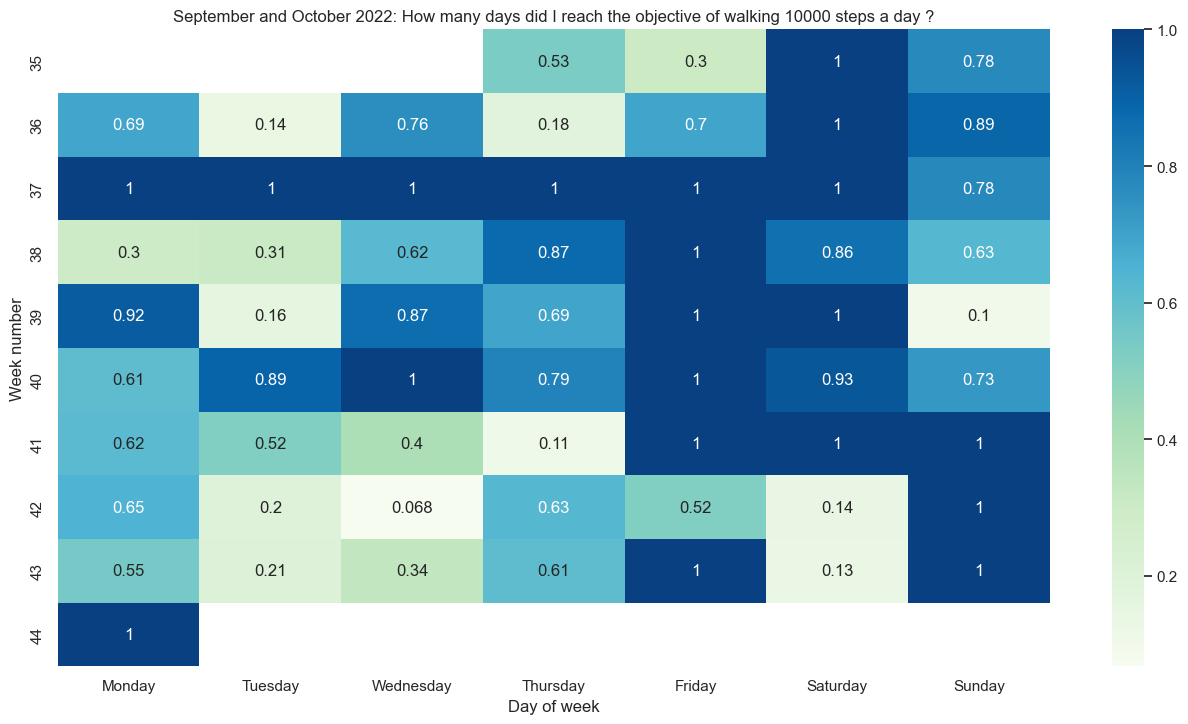

In [24]:
## Graph n°4: Heatmap 

# Prepare the data for the heatmap
sample2 = pedometer[(pedometer["year"]=="2022") 
                    & ((pedometer["month_number"]=="09")
                      | (pedometer["month_number"]=="10"))][["week_number", "weekday","goal_10000"]]

sample2 = sample2.pivot(index= "week_number", columns = "weekday", values = "goal_10000")
cols_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sample2 = sample2[cols_order]

# Heatmap
g5 = sns.heatmap(sample2, annot=True, cmap="GnBu")
g5.set_title("September and October 2022: How many days did I reach the objective of walking 10000 steps a day ?")
g5.set(xlabel = "Day of week", ylabel= "Week number")


<div class="alert alert-block alert-warning">
<b>Learnings:</b> 
    <br>
    <br>
     <b>In September and early October 2022, I could pass the "10000 steps a day" only every 3 other days (12 days out of 39 days in total).</b> 
    <br>
    <br> The days I was successful were mostly Fridays and Saturdays. Indeed, every Fridays (except holidays) I gather with my coworkers to do a quick hike at lunch time in the woods next to our headquarters. On Saturdays, I usually work out by going to the Olympic swimming pool that is a bit far away from my home or by hiking with some Meetup groups. 
    <br>
    <br> On the contrary, I tend to be not very active on Tuesdays as I am often working remotely.
    <br>
    <br> Finally, regarding Week 37, I was able to reach the objective everyday (except Sunday) because I was on holiday and could hike in Spain the whole week.
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5. Conclusion</h2><a class="anchor" id="5"></a>
</div>

## 5.1. Summary of the insights and how to go further  <a class="anchor" id="5.1"></a>

The case study demonstrated that :
* **I am a walker, not a runner**
* **My performances are mainly driven by my schedule.** Indeed, I tend to walk more during the weekends and when I am on holiday (especially in summer). On the contrary, my step count is low when I am working remotely or when the Covid19 lockdown was enforced in France.
* **I do not reach everyday the 10,000 steps a day recommendation made by the World Health Organization.** I try to compensate with long hikes during the weekends or with my coworker group at lunch time.
<br>

The case study could have been improved in various ways, by:
* Developing further the data visualization part with a summary dashboard
* Making some time series predictions (e.g. what do I expect my step count to be next month ?)
* Joining Samsung health data with other data (e.g. weight data, calendar data, etc)

## 5.2. Technical challenges encountered <a class="anchor" id="5.2"></a>

Here are some of the difficulties I faced while making the case study:

* **Dataset understanding: I could not find any exhaustive documentation online about the dataset.** Therefore I had to get rid of some variables because I was not sure about their interpretation (e.g. what is a Samsung "healthy step" ?) 
<br>

* **Quality of data: It was very hard to understand why my original dataset had so many duplicates (Was it a bug of the Samsung Health app ? A timezone problem ? ...) and how to get rid of them properly.** Data cleaning was thus quite tedious.
<br>

* **Data source: The data I got from Samsung underestimate my level of activity** because they come from my smartphone, not a smartwatch. Thus I have no record of my dance class lessons and swimming sessions. This may have been a problem if I had tried to get an exhaustive view of my physical activity level.
<br>

* **Data source: My data cannot be up to date** because I used a flat file as my main data source. Furthermore, I could not make any use of the many Json files that accompanied the csv files. 

## 5.3. What I learnt as a data analyst <a class="anchor" id="5.3"></a>

I aboslutely loved writing this case study ! I learnt a lot because:
* **This was the first time I was coding in Python.** In my professional life, I am used to coding in SQL and R, so this was refreshing to learn how to code a new programming language.
* **This was also the first time I was using the Jupyter Notebook and Markdown formats.** I found it very convenient to display at the same time code, comments and final outputs to make the case study easier to understand.
* **Data cleaning is as always very crucial**. Without getting rid off duplicates, I would have overestimated my total step count by at least 20% !

## Thank you for reading this far and happy hiking !

  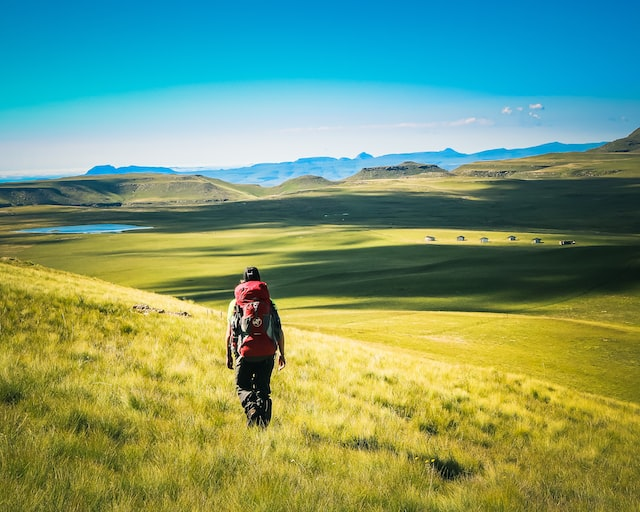
  
  Photo by <a href="https://unsplash.com/@arthurhick?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Arthur Hickinbotham</a> on <a href="https://unsplash.com/s/photos/hiking?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  